<a href="https://colab.research.google.com/github/roshank1605A04/Market-Basket-Analysis/blob/master/Market_Basket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Using Apriori Algorithm**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


**Importing libraries**

In [13]:
# installing apyori package

!pip install apyori

  Stored in directory: /root/.cache/pip/wheels/7b/2a/35/c0c3749c1a36d4f454ea22d8396e1b854b86340d63cbbb7949
Successfully built apyori


In [0]:
import numpy as np
import pandas as pd

from apyori import apriori

**Importing the dataset**

In [7]:
# reading the dataset

df = pd.read_csv('drive/My Drive/Super/market basket/Market_Basket_Optimisation.csv', header = None)

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
print(df.shape)

(7501, 20)


In [9]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,frozen smoothie,frozen smoothie,protein bar,spinach,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


**Data Preprocessing**

In [10]:

# making each customers shopping items an identical list
trans = []
for i in range(0, 7501):
  trans.append([str(df.values[i,j]) for j in range(0, 20)])

# conveting it into an numpy array
trans = np.array(trans)

# checking the shape of the array
print(trans.shape)

# having a look at the top 10 customer's items list
print(trans[1:10])

(7501, 20)
[['burgers' 'meatballs' 'eggs' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
  'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan']
 ['chutney' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
  'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan']
 ['turkey' 'avocado' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
  'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan']
 ['mineral water' 'milk' 'energy bar' 'whole wheat rice' 'green tea'
  'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
  'nan' 'nan' 'nan']
 ['low fat yogurt' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
  'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan']
 ['whole wheat pasta' 'french fries' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
  'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan']
 ['soup' 'light cream' 'shallot' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
  'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan']
 ['fro

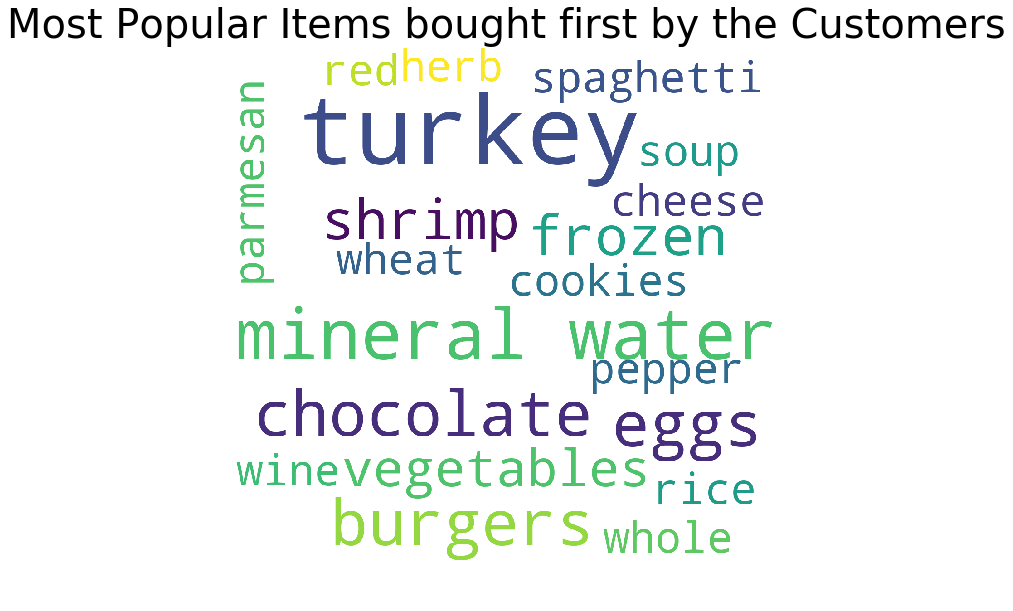

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (10, 10)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 20).generate(str(df[0]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items bought first by the Customers',fontsize = 40)
plt.show()

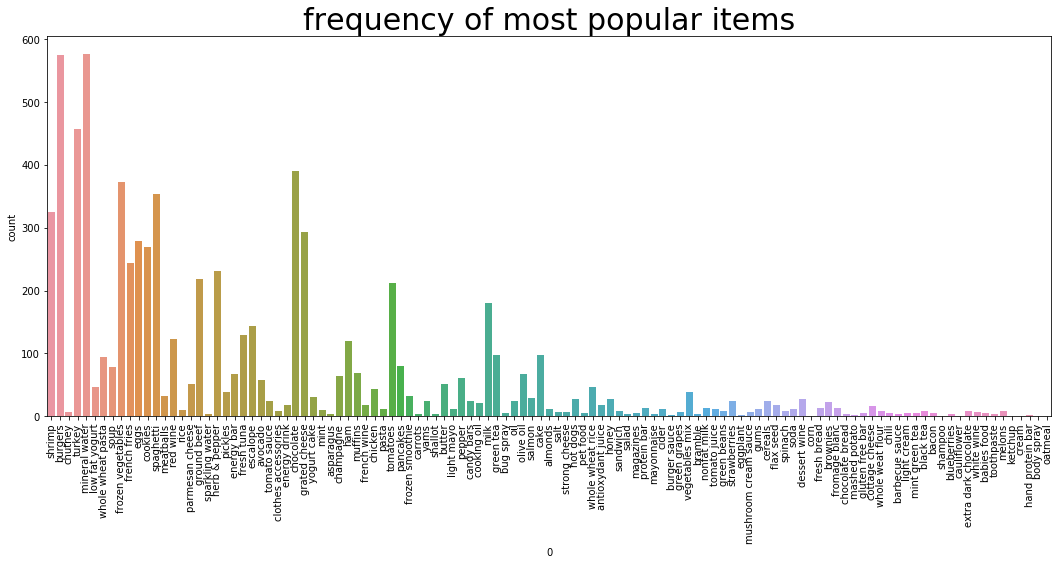

In [25]:
# looking at the frequency of most popular items 

plt.rcParams['figure.figsize'] = (18, 7)
sns.countplot(df[0])
plt.title('frequency of most popular items', fontsize = 30)
plt.xticks(rotation = 90 )
plt.show()

**Training of the dataset**

In [0]:
# applying apriori rules to our dataset

trans = list(trans)
rules = apriori(trans, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2)


**Visualising the results**

In [30]:
results = list(rules)


results

[RelationRecord(items=frozenset({'chicken', 'light cream'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
 RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]),
 RelationRecord(items=frozenset({'escalope', 'pasta'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]),
 RelationRecord(items=frozenset({'honey', 'fromage blanc'}), support=0.003332888948140248, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=frozenset({'honey'}), confidence=0